In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data1 = pd.read_csv('Bengaluru_Data.csv')
data1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
data1['location'].value_counts()

Whitefield                            540
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Garden Layout                           1
Chikkanahalli                           1
Jagadish Nagar                          1
Basvasamithi Layout Vidyaranyapura      1
Navodaya Nagar                          1
Name: location, Length: 1305, dtype: int64

## Data cleaning

In [5]:
data1.drop(['area_type','availability','society'],axis=1,inplace=True)

In [6]:
data2 = data1.dropna()

In [7]:
data2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-8-6672ea3d6b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bhk'] = data2['size'].apply(lambda x: int(x.split(' ')[0]))


In [9]:
## access specific column
data2[data2.bhk >19]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [10]:
def sqrt_is_float(x):     ## it return true if its a normal value
    try:
        float(x)
    except:
        return False
    return True

In [11]:
data2[~data2['total_sqft'].apply(sqrt_is_float)]    ##neget function ie opposite

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [12]:
data3 = data2.copy()

In [13]:
def remove_range(x):        ##value pass must be string
    range = x.split('-')
    if(len(range)==2):
        return (float(range[0])+float(range[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
remove_range('1042 - 1105')

1073.5

In [15]:
data3['total_sqft'] = data3['total_sqft'].apply(remove_range)
data3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [16]:
data3.iloc[30]      ##to call specific row

location      Raja Rajeshwari Nagar
size                          3 BHK
total_sqft                   1693.0
bath                            3.0
balcony                         3.0
price                         57.39
bhk                               3
Name: 33, dtype: object

## feature Engineering

In [17]:
data4 = data3.copy()

In [18]:
data4.location = data4.location.apply(lambda x: x.strip())    ##strip additional space

In [19]:
data4['price_per_sqft'] =  data4['price']*100000/data4['total_sqft']
data4.head(3)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556


In [20]:
location_stats = data4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [21]:
len(location_stats[location_stats<=10])      ##locations with less than 10 houses

1017

In [22]:
location_stats_less_10 =  location_stats[location_stats<=10]     ## store all values less than 10
location_stats_less_10.tail()

location
Kanakapura  Rod         1
Kanakapura Main Road    1
Kanakapura Road         1
Kanakapura Road,        1
whitefiled              1
Name: location, dtype: int64

In [23]:
data4.location = data4.location.apply(lambda x: 'others' if x in location_stats_less_10 else x)

In [24]:
len(data4.location.unique())

238

## Outlier Removal

In [25]:
data5 = data4.copy()

In [26]:
data5[data5.total_sqft / data5.bhk < 250].agg('count')     ##outliers bedroom should be atleat 250

location          529
size              529
total_sqft        529
bath              529
balcony           529
price             529
bhk               529
price_per_sqft    529
dtype: int64

In [27]:
data5 = data5[~(data5.total_sqft / data5.bhk < 250)]
data5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
data5.shape

(12181, 8)

In [29]:
data5.price_per_sqft.describe()

count     12139.000000
mean       6247.976225
std        4025.906065
min         267.829813
25%        4200.000000
50%        5271.084337
75%        6874.439629
max      176470.588235
Name: price_per_sqft, dtype: float64

In [30]:
## function to remove outliers from set 

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,sub_data in df.groupby('location'):
        m =  np.mean(sub_data.price_per_sqft)
        sd = np.std(sub_data.price_per_sqft)
        reduced_data =  sub_data[(sub_data.price_per_sqft >(m-2*sd)) & (sub_data.price_per_sqft <(m+2*sd))]
        df_out = pd.concat([df_out,reduced_data],ignore_index =True)
    return df_out


In [31]:
data6 = remove_outliers(data5)
data6.shape

(11619, 8)

In [32]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data7 = remove_bhk_outliers(data6)

data7.shape

(8196, 8)

Text(0, 0.5, 'Count')

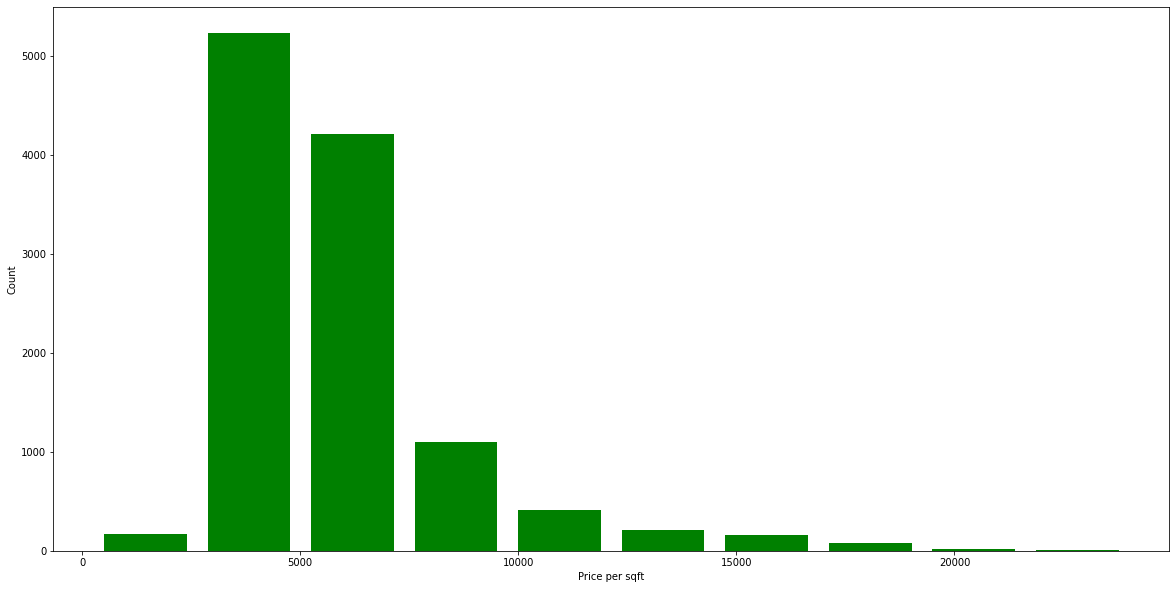

In [33]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(data6.price_per_sqft,rwidth=0.8,color = 'green')      ##rwidth is width of bar in histogram
plt.xlabel('Price per sqft')
plt.ylabel('Count')

In [34]:
data7.bhk.unique()

array([ 4,  3,  2,  1,  5,  6,  7,  8,  9, 10, 11, 27, 13], dtype=int64)

In [35]:
data7[data7.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9536,others,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
10988,others,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [36]:
data7[data7.bath> data7.bhk+2]     ##no of bath room should be <= 2+bhk

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1704,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.333333
1852,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
7853,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


In [39]:
data8 =  data7[data7.bath<=data7.bhk+2]
data8.shape

(8193, 8)

Text(0, 0.5, 'Count')

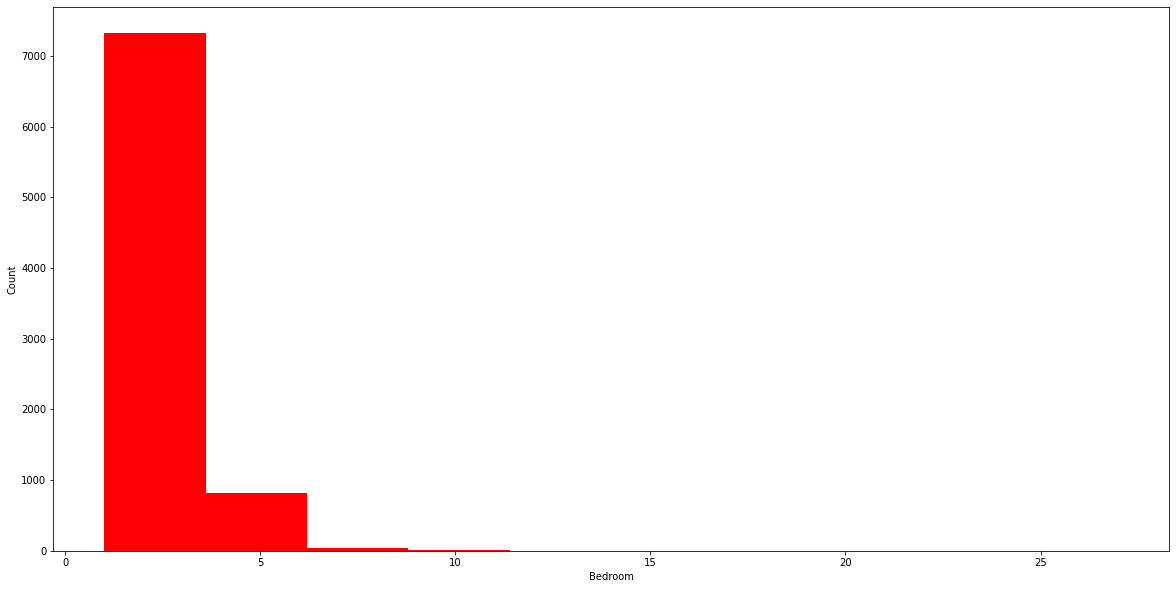

In [40]:
plt.hist(data8.bhk,color = 'red')      
plt.xlabel('Bedroom')
plt.ylabel('Count')

In [41]:
data9 = data8.copy()
data9.drop(['size','price_per_sqft'],axis=1,inplace=True)
data9.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


In [42]:
data9.to_pickle('house_model')

In [2]:
data10 = pd.read_pickle('house_model')
data10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


In [10]:
len(data10.location.value_counts())

238

In [13]:
Location = pd.get_dummies(data10.location,drop_first=True)
Location.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data10 = pd.concat([data10,Location],axis=1)

In [39]:
data10.head(3)

,location,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = data10.drop('location',axis=1)
y = data10.price

## Model Testing And Training

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=101)

In [33]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

In [49]:
modelLR.fit(x_train,y_train)
y_pred = modelLR.predict(x_test)
modelLR.score(x_test,y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix


In [36]:
from sklearn.tree import DecisionTreeRegressor
modelT = DecisionTreeRegressor()
modelT.fit(x_train,y_train)
modelT.score(x_test,y_test)

0.9974120133768488

In [47]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train,y_train)
svr_model.score(x_test,y_test)

0.4758694567192032

In [48]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor()
modelRF.fit(x_train,y_train)
modelRF.score(x_test,y_test)

0.9981110918423777